# Практикум по визуализации

Булыгин Олег  

* [LinkedIn](linkedin.com/in/obulygin)  
* [Telegram](https://t.me/obulygin91)  
* [Vk](vk.com/obulygin91)  
* email: obulygin91@ya.ru    

## План
- библиотека matplotlib  
- библиотека seaborn
- основные типы визуализаций

Визуализация данных – это представление данных в виде, который обеспечивает наиболее эффективную работу человека по их изучению. 

Очень важный инструмент в рамках [EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis), который облегчает определение распределений, поиск аномалий, зависимостей, первичное выдвижение гипотез и пр.

Важность визуализации может продемонстрировать [квартет Энскомба](https://en.wikipedia.org/wiki/Anscombe%27s_quartet).

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#увеличим дефолтный размер графиков
from pylab import rcParams

rcParams['figure.figsize'] = 11,5

# <center> Matplotlib

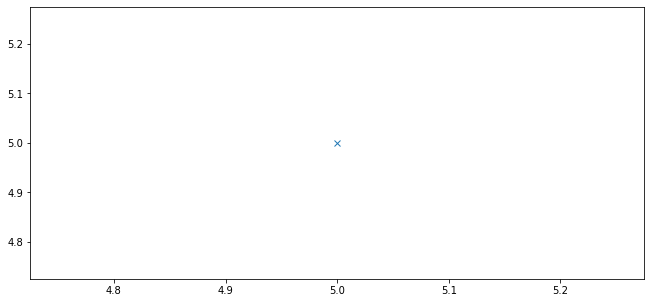

In [ ]:
plt.plot(5, 5, 'x')
# plt.show()

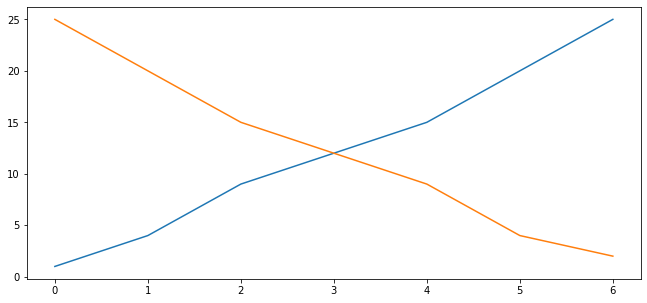

In [ ]:
plt.plot([1, 4, 9, 12, 15, 20, 25])
# plt.show()
plt.plot([25, 20, 15, 12, 9, 4, 2])

Поработаем с данными о продажах и оценках видео-игр с [Kaggle Datasets](https://www.kaggle.com/ashaheedq/video-games-sales-2019?select=vgsales-12-4-2019.csv).

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/obulygin/SkillFactory/main/vgsales.csv')

In [ ]:
print(df.shape)

(16719, 16)


In [ ]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()
# что видим?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [ ]:
df['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [ ]:
df['User_Score'].replace('tbd', np.NaN, inplace=True)

In [ ]:
# исправим типы данных
df['Year_of_Release'] = df.Year_of_Release.astype('Int64')
df['User_Count'] = df.User_Count.astype('Int64')
df['Critic_Count'] = df.Critic_Count.astype('Int64')
df['Critic_Score'] = df.Critic_Score.astype('float64')
df['User_Score'] = df.User_Score.astype('float64')

# переводим оценки в один формат
df['User_Score'] = df['User_Score'] * 10

In [ ]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,71.250461,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,15.000061,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,64.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,75.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,82.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,97.000000,10665.000000


## График

– один из наиболее часто используемых типов визуализаций. 

Отлично подходит, если:
- набор данных непрерывен;
- количество значений больше 20;
- необходимо выявить тенденцию.

Построим график по динамике количества вышедших игр

In [ ]:
dynamics_by_region = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Year_of_Release']] \
    .groupby('Year_of_Release').sum()
dynamics_by_region

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year_of_Release,,,,,
1980,10.59,0.67,0.00,0.12,11.38
1981,33.40,1.96,0.00,0.32,35.77
1982,26.92,1.65,0.00,0.31,28.86
1983,7.76,0.80,8.10,0.14,16.79
1984,33.28,2.10,14.27,0.70,50.36
1985,33.73,4.74,14.56,0.92,53.94
1986,12.50,2.84,19.81,1.93,37.07
1987,8.46,1.41,11.63,0.20,21.74
1988,23.87,6.59,15.76,0.99,47.22


Text(0, 0.5, 'Продажи, млн.')

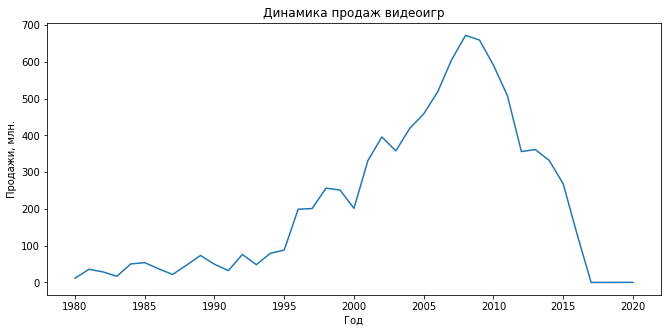

In [ ]:
# применяем функцию plot из matplotlib
# для каждой дополнительной настройки есть своя функция
plt.plot(dynamics_by_region.index, dynamics_by_region['Global_Sales'])
plt.title('Динамика продаж видеоигр')
plt.xlabel('Год')
plt.ylabel('Продажи, млн.')

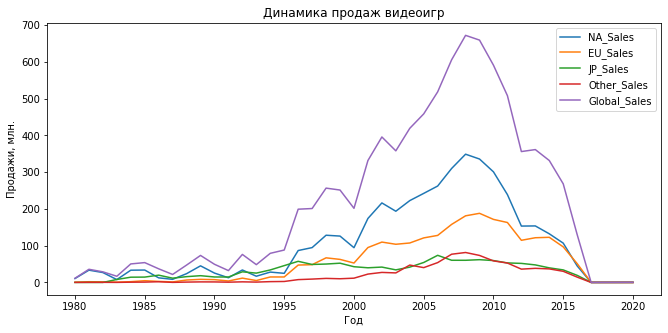

In [ ]:
# можем использовать цикл, чтобы построить графики для каждого региона
for column in dynamics_by_region.columns:
    plt.plot(dynamics_by_region.index, dynamics_by_region[column])
plt.title('Динамика продаж видеоигр')
plt.xlabel('Год')
plt.ylabel('Продажи, млн.') 
plt.legend(dynamics_by_region)

Метод .plot() в pandas основан на matplotlib. Если мы работаем с датафреймами, то это, как правило, более удобный вариант, чем использование matplotlib самой по себе. Мы сконцентрируемся на этом варианте.

Документация: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html

Аргумент kind, позволяет задать тип графика. Исчерпывающий список типов визуализации:

- bar – столбчатая диаграмма;
- barh – горизонтальная столбчатая диаграмма;
- hist – гистограмма;
- box – “ящик с усами”;
- kde – ядерная оценка плотности;
- area – диаграмма с областями накопления;
- pie – круговая диаграмма
- scatter – точечная диаграмма;
- hexbin – гексагональная диаграмма.

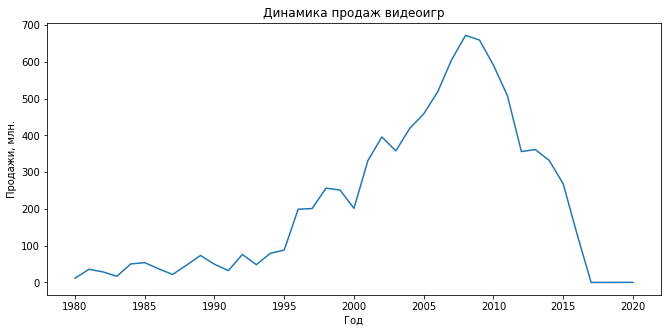

In [ ]:
# если работает с табличными структурами, то можем воспользоваться функционалом, 
# встроенным в pandas. Так удобнее
# Метод plot по-умолчанию использует индекс датафрейма для оси Y
# метод plot по-умолчанию строит график
dynamics_by_region['Global_Sales'].plot(title='Динамика продаж видеоигр',
                                        xlabel='Год', 
                                        ylabel='Продажи, млн.')

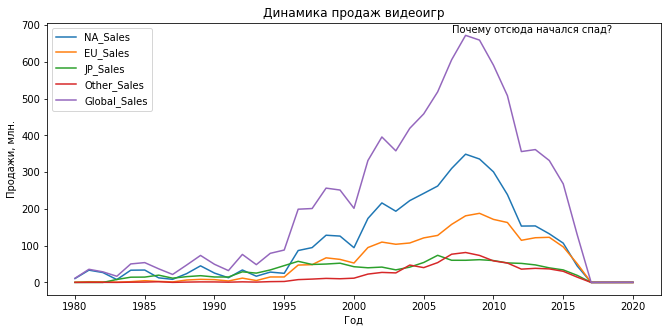

In [ ]:
# plot без цикла построит графики для каждого региона (столбца)
# если у plot нету нужных методов, то можно применить функции matplotlib
dynamics_by_region.plot(title='Динамика продаж видеоигр', 
                             xlabel='Год', 
                             ylabel='Продажи, млн.')
plt.text(2007, 680, 'Почему отсюда начался спад?')  
plt.legend(loc='upper left')

## Area chart

аналогична графику, но пространство между осью Х и линией графика заполняется цветом или рисунком. 

Лучше всего подходит для отображения изменений в составе комплексной величины с течением времени. 

Если категорий больше 3-5, то ее использование вряд ли будет оправдано.


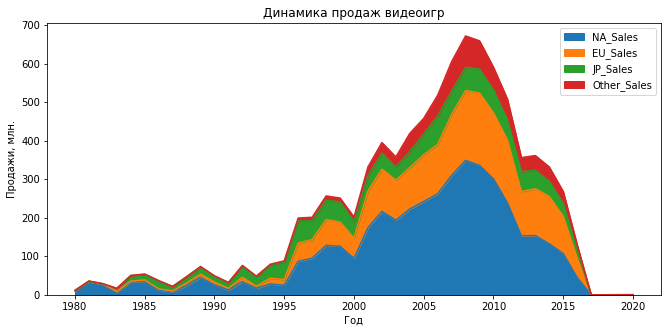

In [ ]:
# по-умолчанию  Area chart всегда накопительный
dynamics_by_region.drop('Global_Sales', axis=1).plot(kind='area',
                             title='Динамика продаж видеоигр', 
                             xlabel='Год', 
                                # stacked=False,
                             ylabel='Продажи, млн.')


## Гистограммы

используется в статистике для представления распределения величины. 

По горизонтальной оси откладывается диапазон наблюдаемых значений, разбитый на определенное число (обычно 10-15) интервалов, а по вертикальной – вероятность или частота ее попадания в каждый интервал. 

По форме гистограммы аналитик может оценить, какому статистическому закону распределения подчиняется величина.


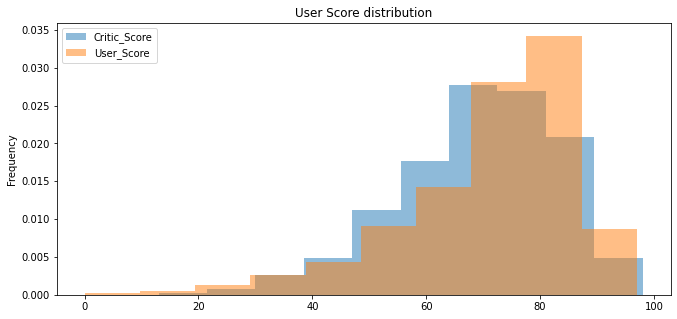

In [ ]:
# распределение оценок пользователей
# df['User_Score'].plot(kind='hist', 
#                    title='User Score distribution',
#                    xlabel='User score',
#                    ylabel='Games')

# сравнение
df.Critic_Score.plot(kind='hist', 
                     title='Critic Score distribution',
                     xlabel='Critic score',
                     ylabel='Games',
                     alpha = 0.5,
                     density = True)

df.User_Score.plot(kind='hist', 
                     title='User Score distribution',
                     xlabel='User score',
                     ylabel='Games',
                     alpha = 0.5,
                     density = True)
plt.legend()

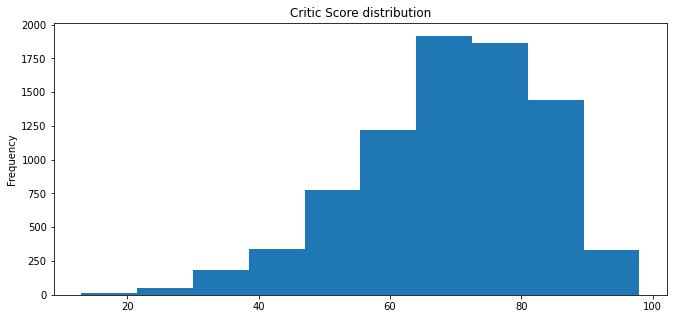

In [ ]:
# распределение оценок критиков
df['Critic_Score'].plot(kind='hist', 
                     title='Critic Score distribution',
                     xlabel='Critic score',
                     ylabel='Games')

## Столбчатая диаграмма

идеально подходит для сравнения показателей. 

Горизонтальные столбчатые диаграммы обычно используют, когда нужно сравнить показатели между собой. 

А вертикальные вариант хорошо подходит для демонстрации изменения показателя в разные периоды.

In [ ]:
# количество игр в разрезе платформ
games_by_platforms = df[['Name', 'Platform']].groupby('Platform').count()
games_by_platforms

,Name
Platform,
2600,133
3DO,3
3DS,520
DC,52
DS,2152
GB,98
GBA,822
GC,556
GEN,27


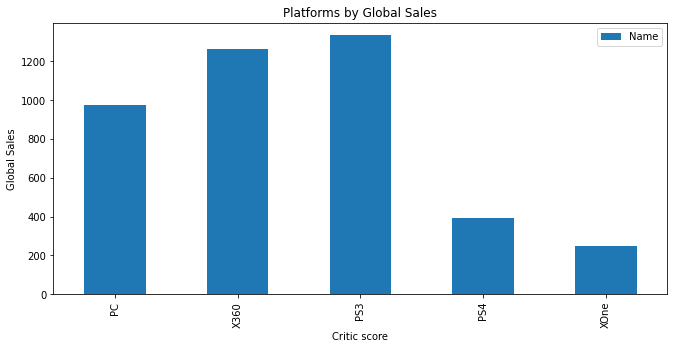

In [ ]:
games_by_platforms.loc[['PC', 'X360', 'PS3', 'PS4', 'XOne']].plot(kind='bar', 
                                                                  title='Platforms by Global Sales',
                                                                  xlabel='Critic score',
                                                                  ylabel='Global Sales')

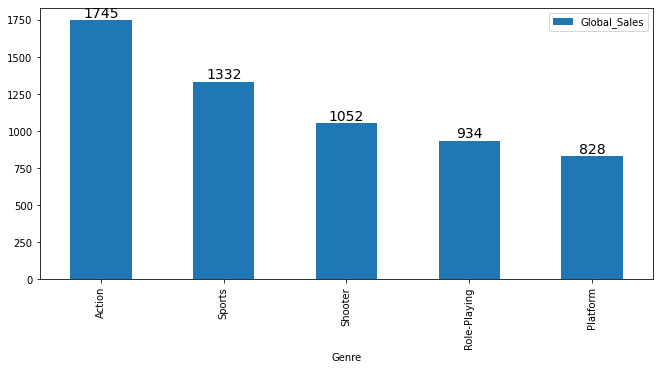

In [ ]:
# топ-5 жанров по продажам
top5_genres = df[['Global_Sales', 'Genre']].groupby('Genre').sum().sort_values('Global_Sales', ascending=False).head(5)
top5_genres.plot(kind='bar')
for i, val in enumerate(top5_genres.values):
    plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':14})

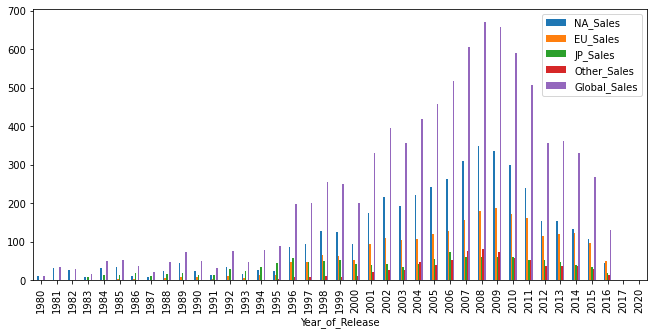

In [ ]:
# динамика продаж в разрезе регионов. Выглядит фигово
dynamics_by_region.plot(kind='bar')

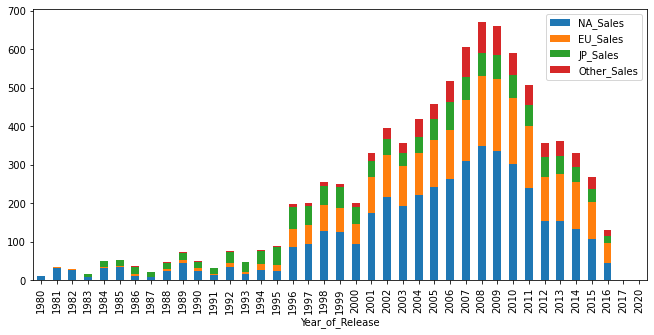

In [ ]:
# Сделаем с накоплением!
dynamics_by_region.drop('Global_Sales', axis=1).plot(kind='bar', stacked=True)

## Круговая диаграмма

[~~худшая диаграмма на свете~~](https://habr.com/ru/company/otus/blog/424647/)  
распространенный способ показать структуру набора данных (какую часть от общего количества составляют отдельные значения).
  
Круговые диаграммы не предназначены для сравнения отдельных категорий друг с другом.

По возможности избегайте их. Мы хорошо воспринимаем длины и размеры, но углы и площади нам воспринимать и сравнивать тяжело.


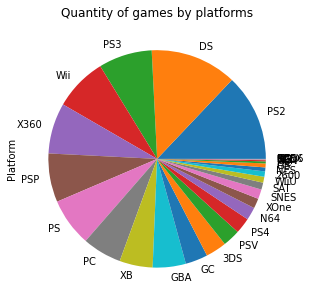

In [ ]:
# количество игр по платформам
pie_data = df['Platform'].value_counts()
pie_data.plot(kind='pie', title='Quantity of games by platforms')

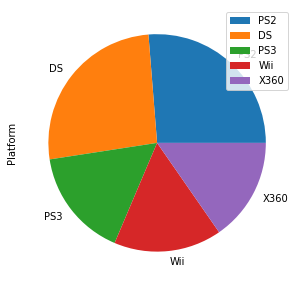

In [ ]:
# количество игр по платформам (берем только топ-5)
top_platforms = df['Platform'].value_counts().sort_values(ascending = False).head(5)
top_platforms.plot(kind='pie')
plt.legend()

## Boxplot

используется в описательной статистике, компактно изображает распределение величин. Одна из немногих визуализаций, позволяющая показать выбросы.

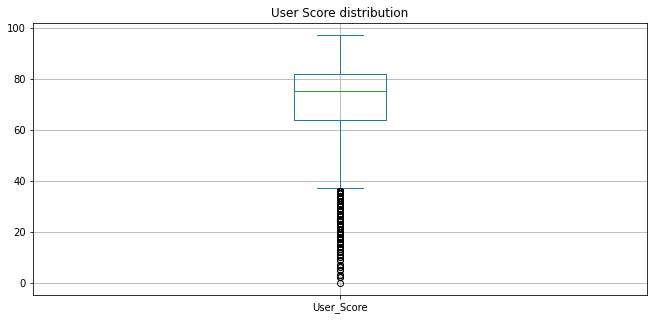

In [ ]:
# очень хорошо подходит для поиска выбросов!
df['User_Score'].plot(kind='box',
                   title='User Score distribution', grid=True)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


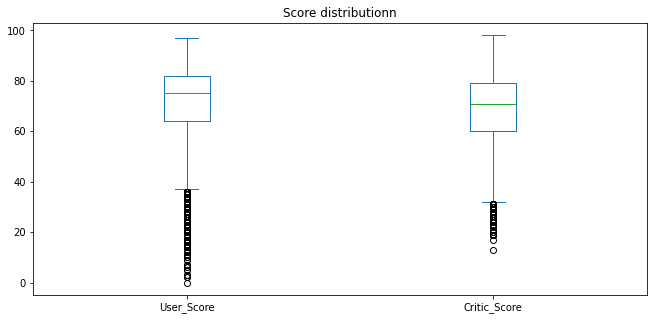

In [ ]:
df[['User_Score', 'Critic_Score']].plot(kind='box',
                                        title='Score distributionn')

## Точечная диаграмма

Каждому наблюдению соответствует точка, координаты которой равны значениям двух параметров этого наблюдения. 

Используются для изучения взаимосвязи между двумя переменными. Также помогают выявлять выбросы.


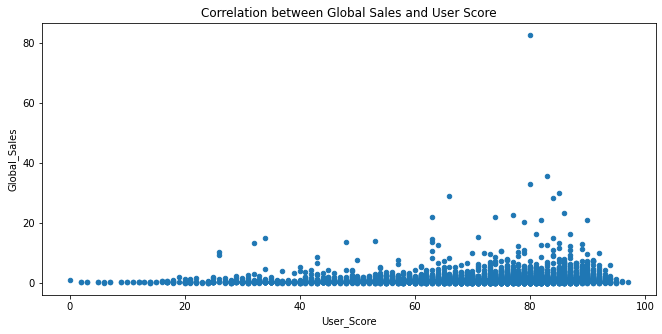

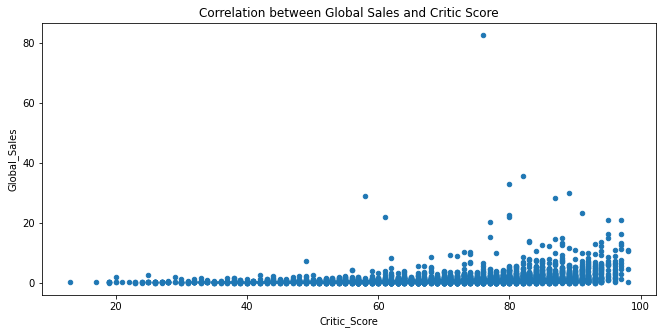

In [ ]:
# посмотрим на взимосвязь оценок и продаж
df.plot(kind='scatter', 
        x='User_Score', 
        y='Global_Sales', 
        title='Correlation between Global Sales and User Score')
plt.show()
df.plot(kind='scatter', 
        x='Critic_Score', 
        y='Global_Sales', 
        title='Correlation between Global Sales and Critic Score')

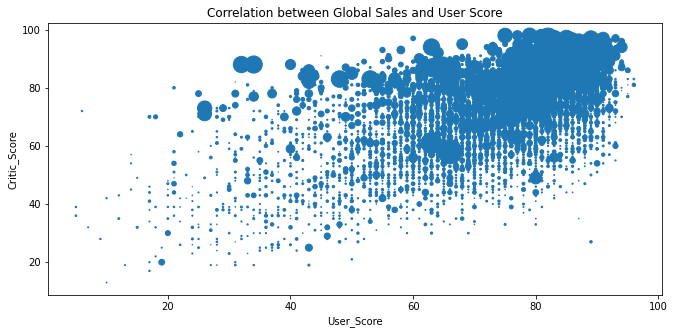

In [ ]:
# добавим третью ось
df.plot(kind='scatter', 
        x='User_Score', 
        y='Critic_Score', 
        s=df['Global_Sales']*20,
        title='Correlation between Global Sales and User Score',
       )

## Стилизация таблиц

Когда построение визуализации неоправданно, можно стилизовать табличную структуру при помощи встроенных инструментов pandas, добавив нужные акценты для лучшего ее восприятия.

Документация: https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html

In [ ]:
# выведем информацию о топ-10 издателях по продажам
top_developers_df = df.groupby('Developer')[['Global_Sales']].sum()\
    .sort_values('Global_Sales', ascending=False).head(10)
    
top_developers_df

,Global_Sales
Developer,
Nintendo,531.71
EA Sports,175.38
EA Canada,142.32
Ubisoft,132.54
Rockstar North,119.47
Capcom,115.71
Ubisoft Montreal,108.31
Treyarch,103.16
EA Tiburon,96.12


In [ ]:
top_developers_df.style.bar(align='mid')

,Global_Sales
Developer,
Nintendo,531.710000
EA Sports,175.380000
EA Canada,142.320000
Ubisoft,132.540000
Rockstar North,119.470000
Capcom,115.710000
Ubisoft Montreal,108.310000
Treyarch,103.160000
EA Tiburon,96.120000


# <center> Seaborn
   
Seaborn – популярная библиотека готовых шаблонов для статистической визуализации, написанная на основе matplotlib.

Имеет выразительный высокоуровневый интерфейс (построение большинства простых графиков происходит в одну строчку кода), а встроенные в нее стили более приятны.

Импорт: import seaborn as sns (библиотека названа в честь Сэмюела Нормана Сиборна (S.N.S) – героя сериала The West Wing, который очень любил автор библиотеки).

Документация: https://seaborn.pydata.org/tutorial.html

In [ ]:
import seaborn as sns

(0.0, 40.0)

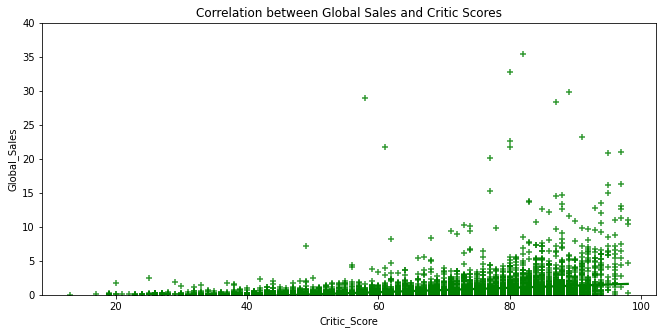

In [ ]:
# посмотрим зависимость продаж и оценок критиков
sns.regplot(data=df, x='Critic_Score', y='Global_Sales', color='green', marker='+')
plt.title('Correlation between Global Sales and Critic Scores')
plt.ylim(0, 40)

C помощью `seaborn` можно построить достаточно сложные визуализации, которые были бы очень сложны для представления в коде при использовании `matplotlib`. Рассмотрим часть из них.

Посмотрим на **распределение оценок критиков `Critic_Score`**. Для этого построим __`distplot`__. По-умолчанию на визуализации отображается гистограмма и [kernel density estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation).

Text(0.5, 1.0, 'Critic Score distribution')

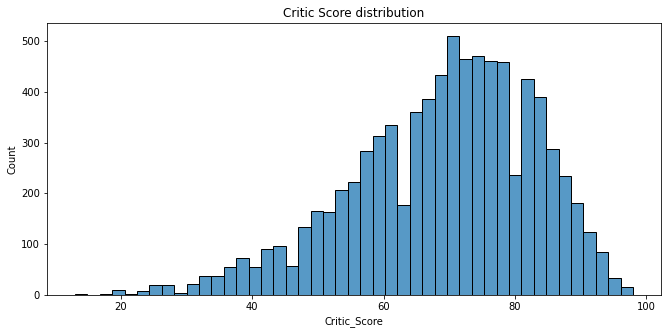

In [ ]:
sns.histplot(df['Critic_Score'])
plt.title('Critic Score distribution')

Для того чтобы подробнее посмотреть на взаимосвязь двух численных признаков можно использовать __`joint_plot`__ – это гибрид `scatter plot` и `histogram`. Посмотрим на то, как связаны между собой **оценка критиков `Critic_Score` и оценка пользователя `User_Score`**.

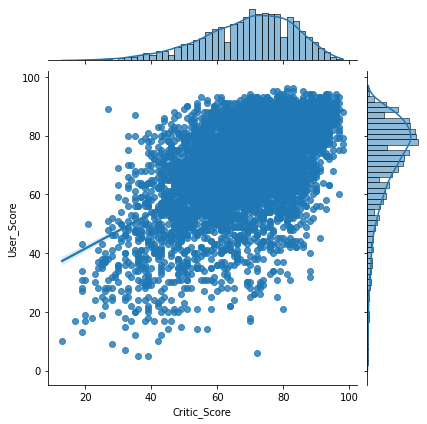

In [ ]:
sns.jointplot(x='Critic_Score', y='User_Score', 
              data=df, kind='reg')

**pair plot (scatter plot matrix)** поможет нам посмотреть на одной картинке, как связаны между собой различные признаки в наборе данных

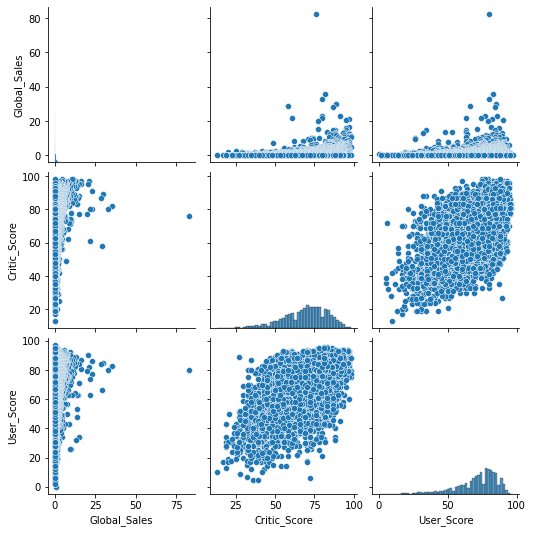

In [ ]:
sns.pairplot(df[['Global_Sales', 'Critic_Score', 'User_Score']])

Давайте **сравним оценки критиков игр для топ-5 крупнейших игровых платформ** при помощи `boxplot`.

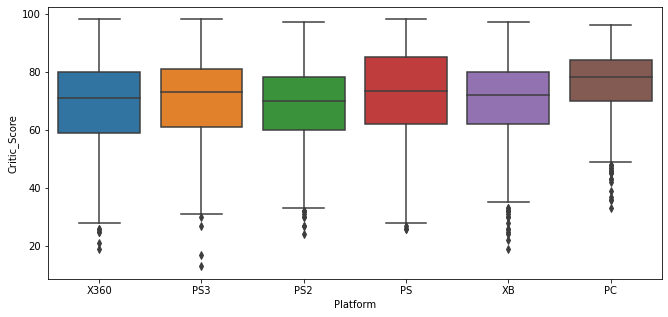

In [ ]:
top_platforms = df.Platform.value_counts().sort_values(ascending = False).head(10).index.values
top_platforms
sns.boxplot(x="Platform", y="Critic_Score", 
            data=df[df.Platform.isin(top_platforms)])

`Heat map` позволяет посмотреть на распределение какого-то численного признака по двум категориальным. Визуализируем **суммарные продажи игр по жанрам и игровым платформам**.

In [ ]:
platform_genre_sales = df[df.Platform.isin(top_platforms)].pivot_table(
                        index='Platform', 
                        columns='Genre', 
                        values='Global_Sales', 
                        aggfunc=sum).fillna(0)

platform_genre_sales

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
DS,112.70,45.90,7.11,135.72,75.92,82.72,38.10,124.44,7.92,130.29,31.41,14.87
GBA,55.76,14.68,4.21,36.25,78.30,12.92,18.80,64.21,3.60,5.91,16.41,7.45
PC,31.71,10.04,0.29,8.57,0.49,0.92,3.99,47.72,45.92,52.61,12.01,46.03
PS,127.05,20.97,72.68,44.90,64.21,12.08,103.19,78.30,39.31,25.33,120.97,21.69
PS2,272.76,21.16,92.60,101.14,72.51,5.90,156.28,93.50,108.57,42.66,273.41,15.15
PS3,301.55,22.28,51.08,46.88,29.71,0.58,72.13,73.67,192.46,10.39,133.88,4.82
PSP,64.11,10.68,21.82,13.91,17.09,5.52,34.29,48.98,19.66,6.23,41.51,10.50
Wii,114.51,17.83,23.36,216.37,88.92,15.37,60.25,13.70,28.15,36.03,288.61,5.03
X360,239.69,14.94,37.34,91.54,11.32,0.85,65.00,71.31,276.98,14.18,138.45,10.03


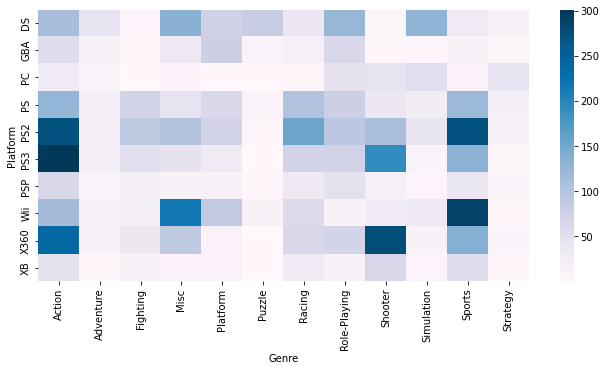

In [ ]:
sns.heatmap(platform_genre_sales, cmap='PuBu')

# <center> 4. Plotly express

Plotly позволяет строить графики в нескольких режимах. Рассмотрим самый новый и подающий надежды — экспресс-режим. Его функциональность скромнее, чем у полного режима Plotly, но нам её будет более чем достаточно. Для работы в экспресс-режиме предназначен модуль plotly.express. Он был выпущен в марте 2019 года и находится в процессе активной разработки.

In [ ]:
import plotly.express as px

In [ ]:
fig = px.histogram( 
    data_frame=df,
    x='Critic_Score',
    nbins=25,
    title='Distribution of critic score',
    width=800,
    height=500,
    marginal='box',
    histnorm='percent'
)
fig.show()

In [ ]:
fig = px.histogram(
    df[df['Year_of_Release'].notna()],
    x='Year_of_Release',
    range_y=[0, 1500],
    width=800,
    height=500,
    title='Distribution of the number of games produced'
)
fig.update_xaxes(type='category', categoryorder='category ascending')
fig.show()

In [ ]:
df

In [ ]:
fig = px.histogram(
    df[df['User_Count'].notna()],
    x='User_Count',
    y='Genre',
    color='Genre',
    title='Distribution of user count by genre',
    width=700,
    height=800,
)
fig.show()

# <center> 5. Plotly (не express)




In [ ]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

data = []

for genre in df.Genre.unique():
    data.append(
        go.Box(y=df[df.Genre==genre].Critic_Score, 
               name=genre)
    )
iplot(data, show_link = False)

In [ ]:
scores_genres_df = df.groupby('Genre')[['Critic_Score', 'User_Score']].mean()
sales_genres_df = df.groupby('Genre')[['Global_Sales']].sum()

genres_df = scores_genres_df.join(sales_genres_df)
    
genres_df.head()
trace0 = go.Scatter(
    x=genres_df.Critic_Score,
    y=genres_df.User_Score,
    mode = 'markers+text',
    text = genres_df.index,
    textposition='bottom center',
    marker = dict(
        size = 1/10*genres_df.Global_Sales,
        color = [
            'aqua', 'azure', 'beige', 'lightgreen',
            'lavender', 'lightblue', 'pink', 'salmon',
            'wheat', 'ivory', 'silver'
        ]
    )
)

data = [trace0]
layout = {
    'title': 'Statistics of video games genres',
    'xaxis': {'title': 'Critic Score'},
    'yaxis': {'title': 'User Score'}
}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

### Как правильно выбрать тип визуализации?

[DataVizCatalogue](https://datavizcatalogue.com/)  
[ExtremePresentation](https://extremepresentation.com/tools/)  
[PythonGraphGallery](https://www.python-graph-gallery.com/)  
[А так не надо](https://t.me/awfulcharts)  

### Спасибо за внимание буду рад ответить на ваши вопросы!
Ссылка на форму ОС:
https://forms.gle/y8xaFwJqtbFSjUeG8